# **Manipulador robótico con 3 grados de libertad**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [ ]:
import numpy as np
from sympy import*
from IPython.display import Image
import matplotlib.pyplot as plt


init_printing()

In [ ]:
Image(url='../Examples/3.png')

In [ ]:
Image(url='../Examples/4.png')

Vamos a descrbir el algebra simula la dinámica directa del anterior brazo robótico

In [ ]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
theta_3 = symbols("theta_3",  real=True)
alpha = symbols("alpha",  real=True)

l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)
l_3 = symbols("l_3",  real=True)

Rotación de la base (articulación 1) un angulo theta 1 zobre el eje z

In [ ]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Translación l_1 sobre el eje z desde la base hasta la articulación 2

In [ ]:
_1H2 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, l_1], [0, 0, 0, 1]])
_1H2


⎡1  0  0  0 ⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  l₁⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Rotación del sistema de referencia (90 grados sobre el eje X)

In [ ]:
_2H3 = Matrix([[1, 0, 0, 0], [0, cos(alpha), -sin(alpha), 0], [0, sin(alpha), cos(alpha), 0], [0, 0, 0, 1]])
_2H3

⎡1    0        0     0⎤
⎢                     ⎥
⎢0  cos(α)  -sin(α)  0⎥
⎢                     ⎥
⎢0  sin(α)  cos(α)   0⎥
⎢                     ⎥
⎣0    0        0     1⎦

In [ ]:
_2H3 = _2H3.subs(alpha, pi/2)
_2H3

⎡1  0  0   0⎤
⎢           ⎥
⎢0  0  -1  0⎥
⎢           ⎥
⎢0  1  0   0⎥
⎢           ⎥
⎣0  0  0   1⎦

Rotación theta_2 sobre el nuevo eje Z en la articulación 2

In [ ]:
_3H4 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_3H4


⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Translación l_2 sobre el nuevo eje X desde la articulación 2 hasta la articulación 3

In [ ]:
_4H5 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_4H5


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Rotación theta_3 sobre el nuevo eje Z para la articulación 3

In [ ]:
_5H6 = Matrix([[cos(theta_3), -sin(theta_3), 0, 0], [sin(theta_3), cos(theta_3), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_5H6


⎡cos(θ₃)  -sin(θ₃)  0  0⎤
⎢                       ⎥
⎢sin(θ₃)  cos(θ₃)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Traslación l_3 desde la articulación 3 hasta el efector final (muñeca)

In [ ]:
_6H7 = Matrix([[1, 0, 0, l_3], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_6H7

⎡1  0  0  l₃⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Para encontrar la posición y la orientación del sistema de referencia W3 respecto a W0 se puede realizar la composición de las transformaciones de cada estado, así:

In [ ]:
Hs =_0H1@_1H2@_2H3@_3H4@_4H5@_5H6@_6H7
Hs

⎡-sin(θ₂)⋅sin(θ₃)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃)  -sin(θ₂)⋅cos(θ₁)⋅cos(θ₃)  ↪
⎢                                                                              ↪
⎢-sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₃)  -sin(θ₁)⋅sin(θ₂)⋅cos(θ₃)  ↪
⎢                                                                              ↪
⎢        sin(θ₂)⋅cos(θ₃) + sin(θ₃)⋅cos(θ₂)                   -sin(θ₂)⋅sin(θ₃)  ↪
⎢                                                                              ↪
⎣                        0                                                   0 ↪

↪ - sin(θ₃)⋅cos(θ₁)⋅cos(θ₂)  sin(θ₁)   l₂⋅cos(θ₁)⋅cos(θ₂) + l₃⋅(-sin(θ₂)⋅sin(θ ↪
↪                                                                              ↪
↪ - sin(θ₁)⋅sin(θ₃)⋅cos(θ₂)  -cos(θ₁)  l₂⋅sin(θ₁)⋅cos(θ₂) + l₃⋅(-sin(θ₁)⋅sin(θ ↪
↪                                                                              ↪
↪ + cos(θ₂)⋅cos(θ₃)             0                l₁ + l₂⋅sin(θ₂) + l₃⋅(sin(θ₂) ↪
↪                          

In [ ]:
H = simplify(_0H1@_1H2@_2H3@_3H4@_4H5@_5H6@_6H7)
H

⎡cos(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₂ + θ₃)⋅cos(θ₁)  sin(θ₁)   (l₂⋅cos(θ₂) + l₃⋅cos(θ ↪
⎢                                                                              ↪
⎢sin(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₁)⋅sin(θ₂ + θ₃)  -cos(θ₁)  (l₂⋅cos(θ₂) + l₃⋅cos(θ ↪
⎢                                                                              ↪
⎢    sin(θ₂ + θ₃)          cos(θ₂ + θ₃)          0        l₁ + l₂⋅sin(θ₂) + l₃ ↪
⎢                                                                              ↪
⎣         0                      0               0                        1    ↪

↪ ₂ + θ₃))⋅cos(θ₁)⎤
↪                 ⎥
↪ ₂ + θ₃))⋅sin(θ₁)⎥
↪                 ⎥
↪ ⋅sin(θ₂ + θ₃)   ⎥
↪                 ⎥
↪                 ⎦

Esta será la posición final de la muñeca en función de theta1, theta2, theta3, l1, l2 y l3

In [ ]:
P = H[0:3, 3]
P

⎡(l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅cos(θ₁)⎤
⎢                                      ⎥
⎢(l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅sin(θ₁)⎥
⎢                                      ⎥
⎣  l₁ + l₂⋅sin(θ₂) + l₃⋅sin(θ₂ + θ₃)   ⎦

Y esta será la orientación final de la muñeca en función theta1, theta2, theta3, l1, l2 y l3

In [ ]:
R = H[0:3, 0:3]
R

⎡cos(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₂ + θ₃)⋅cos(θ₁)  sin(θ₁) ⎤
⎢                                                     ⎥
⎢sin(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₁)⋅sin(θ₂ + θ₃)  -cos(θ₁)⎥
⎢                                                     ⎥
⎣    sin(θ₂ + θ₃)          cos(θ₂ + θ₃)          0    ⎦

## Taller

Suponga un manipulador robotico con 3 grados de libertad. El brazo mide 40cm y el ante brazo mide 50cm. Los angulos de rotación no tienen restricciones. Suponga que la muñeca puede agarrar cualquier objeto que se encuentre a menos de 5cm de ella.

* Determine al menos 2 configuraciones de theta1, theta2 y theta3 que permitan alcanzar un objeto en la posición x=45, y=36, z=22. Utilice fuerza bruta para ello o cualquier estrategia objetiva para conseguirlo.

## Calificación

Los tres grupos con el mejor avance antes de finalizar la clase tendrá puntos extras en la calificación del corte, así:

* Mejor avance --> 0.3
* Segundo mejor avance --> 0.2
* Tercer mejor avance --> 0.1

# Definición y dibujo de la función

In [ ]:
def brazo_mecanico3d(theta1, theta2, theta3, l1, l2, l3):
    """Dibuja un brazo mecanico 3D con 3 articulaciones.

    Parámetros:
      theta1: Angulo de la primera articulación
      theta2: Angulo de la segunda articulación
      theta3: Angulo de la tercera articulación
      l1: Longitud del primer eslabón.
      l2: Longitud del segundo eslabón.
      l3: Longitud del tercer eslabón.
    """

    # Punto de la base
    base = np.array([0, 0, 0])

    # Articulación 1
    x1 = l1 * np.cos(theta2)  # movimiento
    z1 = l1 * np.sin(theta2)
    joint1 = np.array([x1, 0, z1])
    joint1_rot = np.array([
        np.cos(theta1) * joint1[0] - np.sin(theta1) * joint1[1],
        np.sin(theta1) * joint1[0] + np.cos(theta1) * joint1[1],
        joint1[2]
    ])

    # Articulación 2
    x2 = x1 + l2 * np.cos(theta2 + theta3)
    z2 = z1 + l2 * np.sin(theta2 + theta3)
    joint2 = np.array([x2, 0, z2])
    joint2_rot = np.array([
        np.cos(theta1) * joint2[0] - np.sin(theta1) * joint2[1],
        np.sin(theta1) * joint2[0] + np.cos(theta1) * joint2[1],
        joint2[2]
    ])

    # Articulación 3
    x3 = x2 + l3 * np.cos(theta2 + theta3)
    z3 = z2 + l3 * np.sin(theta2 + theta3)
    joint3 = np.array([x3, 0, z3])
    joint3_rot = np.array([
        np.cos(theta1) * joint3[0] - np.sin(theta1) * joint3[1],
        np.sin(theta1) * joint3[0] + np.cos(theta1) * joint3[1],
        joint3[2]
    ])

    # Coordenadas del gráfico
    xs = [base[0], joint1_rot[0], joint2_rot[0], joint3_rot[0]]
    ys = [base[1], joint1_rot[1], joint2_rot[1], joint3_rot[1]]
    zs = [base[2], joint1_rot[2], joint2_rot[2], joint3_rot[2]]

    # Gráfica
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xs, ys, zs, 'o-', color='blue', linewidth=4, markersize=8, label='Brazo')
    ax.scatter(xs[-1], ys[-1], zs[-1], color='green', s=100, label='Efector final')

    if objetivo is not None:
        ax.scatter(objetivo[0], objetivo[1], objetivo[2], color='red', s=100, label='Objetivo')

    ax.set_xlim([-100, 100])
    ax.set_ylim([-100, 100])
    ax.set_zlim([0, 100])
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    ax.set_title('Simulación del brazo robótico 3D')
    ax.legend()
    plt.grid(True)
    plt.show()


## Posición 1 (Usando fuerza bruta)

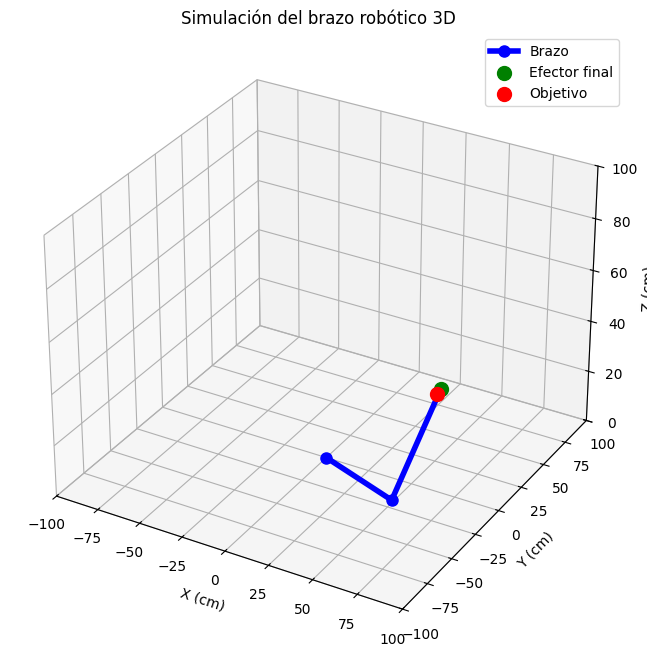

In [ ]:
# Valores de los ángulos en grados
theta1_deg = 40
theta2_deg = -30
theta3_deg = 90

# Conversión a radian
theta1_rad = np.deg2rad(theta1_deg)
theta2_rad = np.deg2rad(theta2_deg)
theta3_rad = np.deg2rad(theta3_deg)

# Longitudes del brazo
l1 = 40  # cm
l2 = 50  # cm
l3 = 0   # No se expresó una longitud para el eslabón 3

# Coordenada del objeto
objetivo = [45, 36, 22]

# Dibujar
brazo_mecanico3d(theta1_rad, theta2_rad, theta3_rad, l1, l2, l3)


Usando fuerza bruta se llegó a la conclusión de que hay muchas combinaciones que permiten llegar al objetivo, en esta primera solución se usó la combinación de los ángulos (40, -30, 90)

## Posición 2 (Usando fuerza bruta)

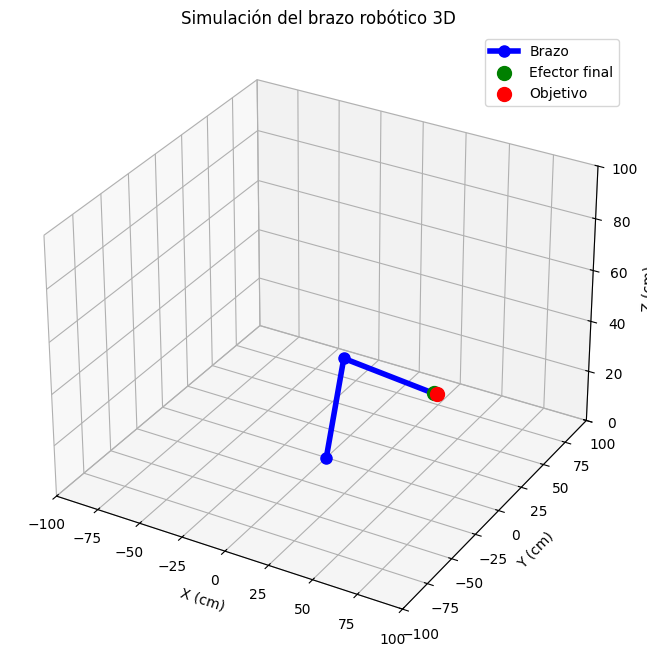

In [ ]:
# Valores de los ángulos en grados
theta1_deg = 40
theta2_deg = 77
theta3_deg = -97

# Conversión a radian
theta1_rad = np.deg2rad(theta1_deg)
theta2_rad = np.deg2rad(theta2_deg)
theta3_rad = np.deg2rad(theta3_deg)

# Longitudes del brazo
l1 = 40  # cm
l2 = 50  # cm
l3 = 0  # No se expresó una longitud para el eslabón 3

# Coordenada del objeto
objetivo = [45, 36, 22]

# Dibujar
brazo_mecanico3d(theta1_rad, theta2_rad, theta3_rad, l1, l2, l3)


Para la segunda solución se usó la combinación de (40, 77, -97) haciendo posible alcanzar el objeto de manera exitosa.